In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data Preparing and loading

Data can be almost anything
* Excel
* Images
* Videos
* Audio
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

In [3]:
# Create known parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and testing sets

In [5]:
# Let's create a train and test sets for our data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    #Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # Show the legend
    plt.legend(prop={"size": 14});

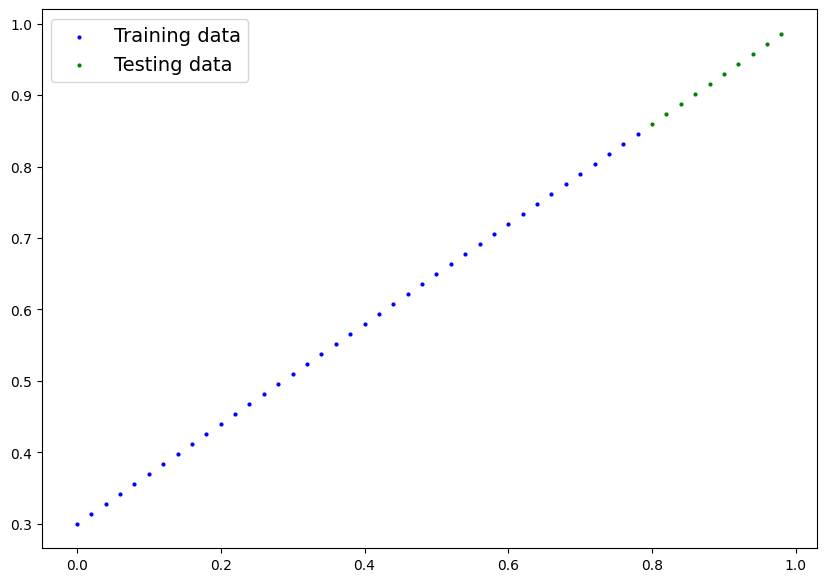

In [8]:
plot_predictions();

## 2. Build model

In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inheritence in nn.Module
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype=float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # forward() defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph) 
* torch.nn. Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward() 
* torch.optim - this where the optimizers in PyTorch live, they will help with radient descent
* def forward() - All nn.module subclasses require you to overwirite forward(), this method defines what happens in the forward computation 

### Checking the contents of our PyTorch model

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List name parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive piwer, let's see how well it predicts`y_test` based on `xtest`

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

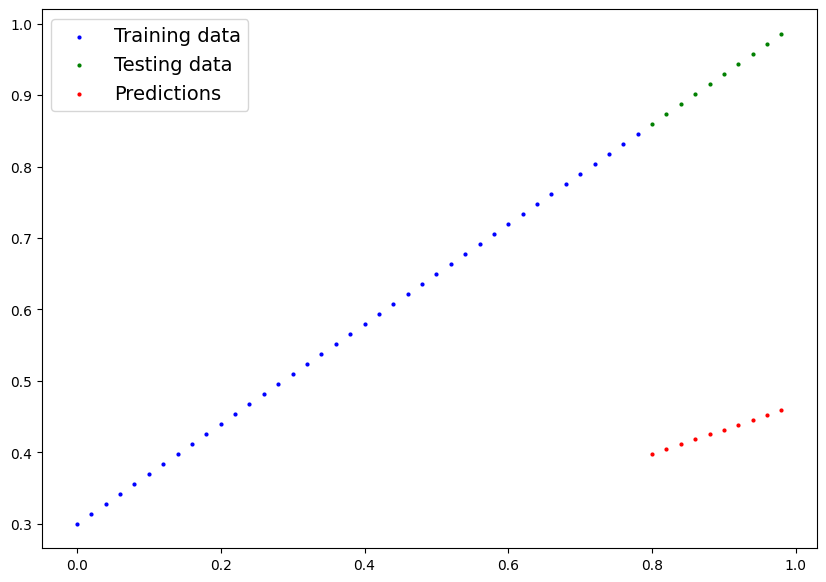

In [14]:
plot_predictions(predictions=y_preds)

In [15]:
with torch.inference_mode():
    y_preds = model_0(X_test)

# Can also do something simmilar with torch.no_grad()
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

## 3. Train model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters. Or in other words from a poor representation of the data to a better representation of the data. One way to measure how poor or how wrong your models predictions are is to use a loss function. 

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function. 

Things we need to train: 
* **Loss function :** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better. 
* **Optimizer :** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A Training loop
* A testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check out model's parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate (hyper parameter)

### Buildin a training and testing loop in PyTorch

Things we need for training model
0. Loop through the data
1. Forward Pass(propagation)
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward
5. Optimizer step


In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
epochs = 250

# Model training
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # Train mode in Pytorch sets all parameters require gradients to require gradients
    
    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print("Loss:",loss)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode(): # turns off gradient tracking
        # 1. Do the forward pass 
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")

Loss: tensor(0.3129, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch: 0 | Test: 0.31288135462074396 | Test Loss: 0.48106517657284636
Loss: tensor(0.3014, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2898, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2783, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2668, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2553, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2438, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2322, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2207, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.2092, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.1977, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch: 10 | Test: 0.19767130161291763 | Test Loss: 0.34635512328282925
Loss: tensor(0.1862, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(0.1746, dtype=torch.float64, grad_fn=<Mean

In [21]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093]))])

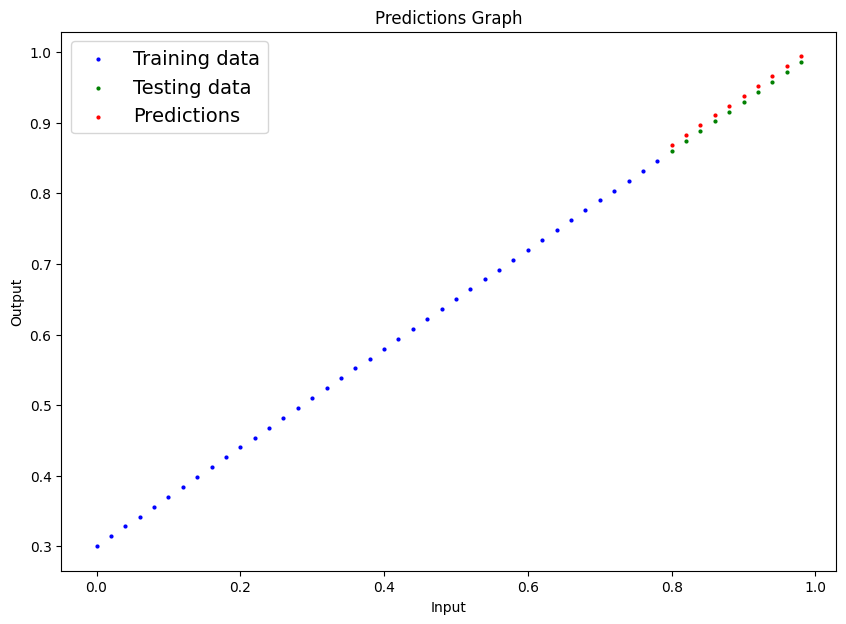

In [23]:
plot_predictions(predictions=y_preds_new)
plt.title("Predictions Graph")
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig("Predictions.png")

In [24]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288135, 0.1976713 , 0.0890872 , 0.05314849, 0.04543793,
       0.04167861, 0.0381893 , 0.03476087, 0.03132382, 0.0278874 ,
       0.02445897, 0.02102024, 0.0175855 , 0.01415545, 0.01071665,
       0.0072836 , 0.00385186, 0.0089323 , 0.0089323 , 0.0089323 ,
       0.0089323 , 0.0089323 , 0.0089323 , 0.0089323 , 0.0089323 ])

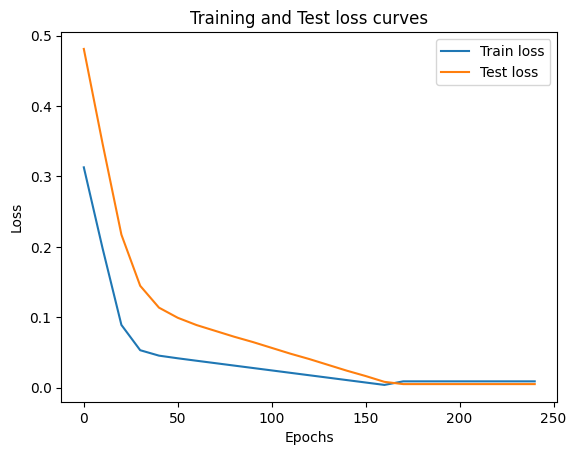

In [25]:
# Plot of the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.savefig('loss_curves.png')
plt.show()

### Saving a model in PyTorch

3 types for saving and loading model

1. `torch.save()`- in pickle format
2. `torch.load()` - load the saved model
3. `torch.nn.Model.load_state_dict()` - load a model's saved state dictionary

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093]))])

In [27]:
# Saving a PyTorch model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
torch.save(model_0, r"models\01_pytorch_workflow_model_0.pkl")

In [28]:
# Load the Model
loaded_model = torch.load(r'models\01_pytorch_workflow_model_0.pkl', weights_only=False)

In [29]:
loaded_model

LinearRegressionModel()

In [30]:
with torch.inference_mode():
    y_new = loaded_model(X_test)

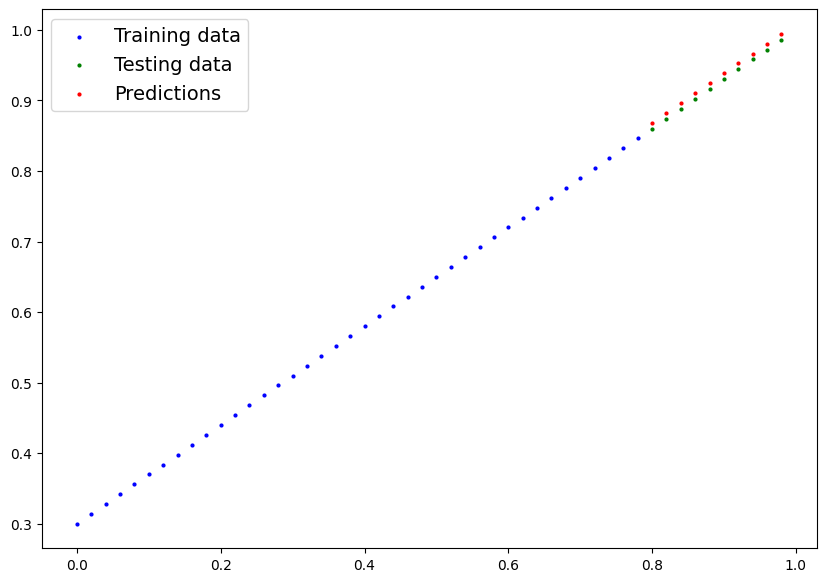

In [31]:
plot_predictions(predictions=y_new)

### 6.1 Data

In [32]:
# Create some data using the liner regression formula of y = weight*X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y 
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

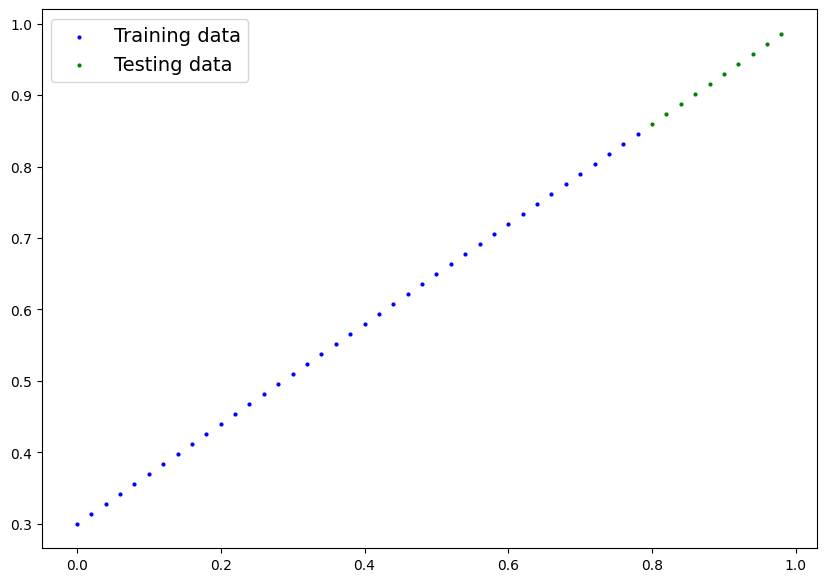

In [34]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a Pytorch Linear Model

In [37]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating a model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    # Forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict(), model_1

(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ))

In [38]:
with torch.inference_mode():
    y_pred_v1 = model_1(X_test)

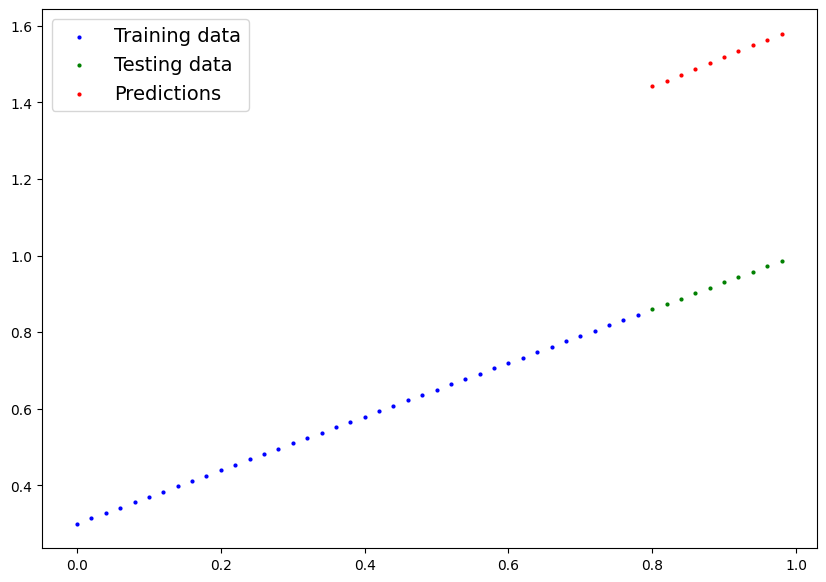

In [39]:
plot_predictions(predictions=y_pred_v1)

### 6.3 Training and testing

In [40]:
# Setup the loss function
loss_fn = nn.L1Loss()

# setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [41]:
# Training
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [43]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [44]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predicting

In [45]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_pred = model_1(X_test)

In [47]:
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

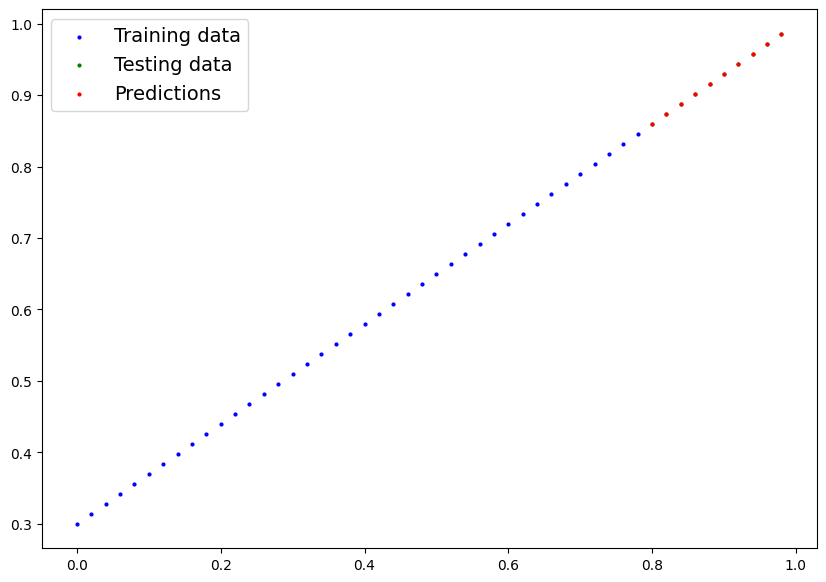

In [46]:
plot_predictions(predictions=y_pred)

### 6.5 Model saving and loading

In [49]:
torch.save(model_1, r"models\model_1")

In [55]:
loaded_model_1 = torch.load(r"models\model_1", weights_only=False)

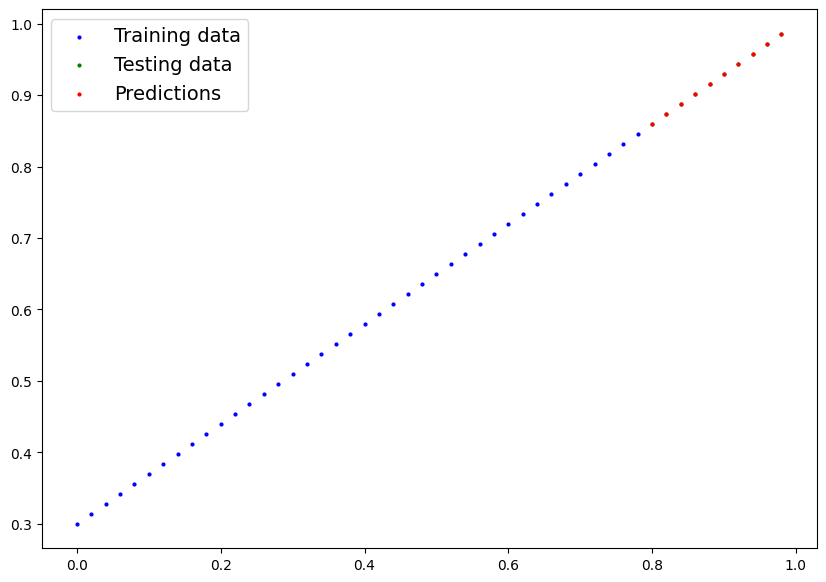

In [57]:
with torch.inference_mode():
    new_pred = loaded_model_1(X_test)

plot_predictions(predictions=new_pred)